In [4]:
# For dataframes
import pandas as pd 

# For numerical arrays
import numpy as np 

# For stemming/Lemmatisation/POS tagging
import spacy

# For getting stopwords
from spacy.lang.en.stop_words import STOP_WORDS

# For K-Fold cross validation
from sklearn.model_selection import KFold

# For visualizations
import matplotlib.pyplot as plt

# For regular expressions
import re

# For handling string
import string

# For all torch-supported actions
import torch

# For spell-check
# from spellchecker import SpellChecker

# For performing mathematical operations
import math

# For dictionary related activites
from collections import defaultdict

# For counting actions (EDA)
from collections import  Counter

# For count vectorisation (EDA)
from sklearn.feature_extraction.text import CountVectorizer

# For one-hot encoding
from tensorflow.keras.utils import to_categorical

# For DL model
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding, LSTM
from tensorflow.keras.models import Model, Sequential

# For generating random integers
from random import randint

#For making wordclouds
from wordcloud import WordCloud 

# For TF-IDF vectorisation
from sklearn.feature_extraction.text import TfidfVectorizer

# For padding
from tensorflow.keras.preprocessing.sequence import pad_sequences

# For tokenization
from tensorflow.keras.preprocessing.text import Tokenizer

# For plotting
import seaborn as sns

print("Necessary libraries imported")

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 

Necessary libraries imported


In [10]:
df=pd.read_csv('G:/AIE/AIE SEM6/NLP/Assignment/train.csv')
df.head(10)

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
5,00004f9a462a357c33be,"Is Gaza slowly becoming Auschwitz, Dachau or T...",0
6,00005059a06ee19e11ad,Why does Quora automatically ban conservative ...,0
7,0000559f875832745e2e,Is it crazy if I wash or wipe my groceries off...,0
8,00005bd3426b2d0c8305,"Is there such a thing as dressing moderately, ...",0
9,00006e6928c5df60eacb,Is it just me or have you ever been in this ph...,0


Total rows in dataset:  1306122 Rows

Dataset columns: 
Index(['qid', 'question_text', 'target'], dtype='object')

Null Statistics (in %): 
qid              0.0
question_text    0.0
target           0.0
dtype: float64

Dataset description: 
             target
count  1.306122e+06
mean   6.187018e-02
std    2.409197e-01
min    0.000000e+00
25%    0.000000e+00
50%    0.000000e+00
75%    0.000000e+00
max    1.000000e+00

Essay prompt frequency: 
       question_text         
               count   unique
target                       
0            1225312  1225312
1              80810    80810

Max and Min statistics for word/char count of question_text: 
MAX	 1017 characters, 134 words
MIN	 1 character(s), 1 word(s)
Pie plot against Target


<AxesSubplot:title={'center':'Target categories'}, ylabel='target'>

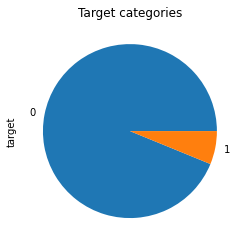

In [11]:
print('Total rows in dataset: ',len(df),'Rows\n')
print('Dataset columns: ')
print(df.columns)
print('\nNull Statistics (in %): ')
print(df.isnull().sum()* 100 / len(df))
print('\nDataset description: ')
print(df.describe())
print('\nEssay prompt frequency: ')
print(df.groupby("target").describe().loc[:,[('question_text',  'count'),('question_text', 'unique')]])

print('\nMax and Min statistics for word/char count of question_text: ')
print('MAX\t',max(df.question_text.apply(lambda x: len(x))),'characters,',
     max(df.question_text.apply(lambda x: len(x.split()))), 'words')
print('MIN\t',min(df.question_text.apply(lambda x: len(x))),'character(s),',
     min(df.question_text.apply(lambda x: len(x.split()))), 'word(s)')

print('Pie plot against Target')
df.target.value_counts().plot(title='Target categories',kind='pie')

ScatterPlot for Target vs average word length


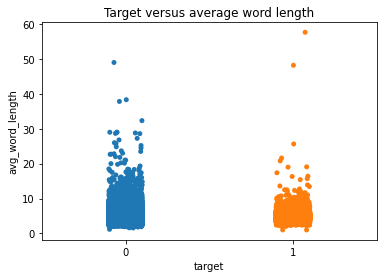

In [12]:
def get_avg_length(essay):
    summ=0
    for word in essay.split():
        summ+=len(word)
    return round(summ/len(essay.split()),2)

df['avg_word_length']=df.question_text.apply(lambda x: get_avg_length(x))
print("ScatterPlot for Target vs average word length")
plt.plot(figsize=(10,10)) 
plt.title('Target versus average word length')

sns.stripplot(data=df,
    x="target", y="avg_word_length")

plt.show()

Boxplot for Target vs total words


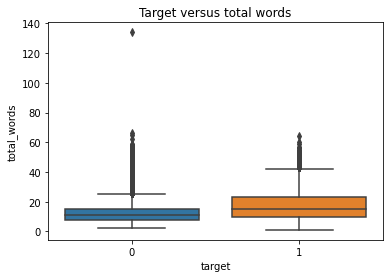

In [14]:
df['total_words']=df.question_text.apply(lambda x: len(x.split()))
print("Boxplot for Target vs total words")
plt.plot(figsize=(8,15)) 
plt.title('Target versus total words')

sns.boxplot(data=df,
    x="target", y="total_words")
plt.show()

Stop-word freuqency


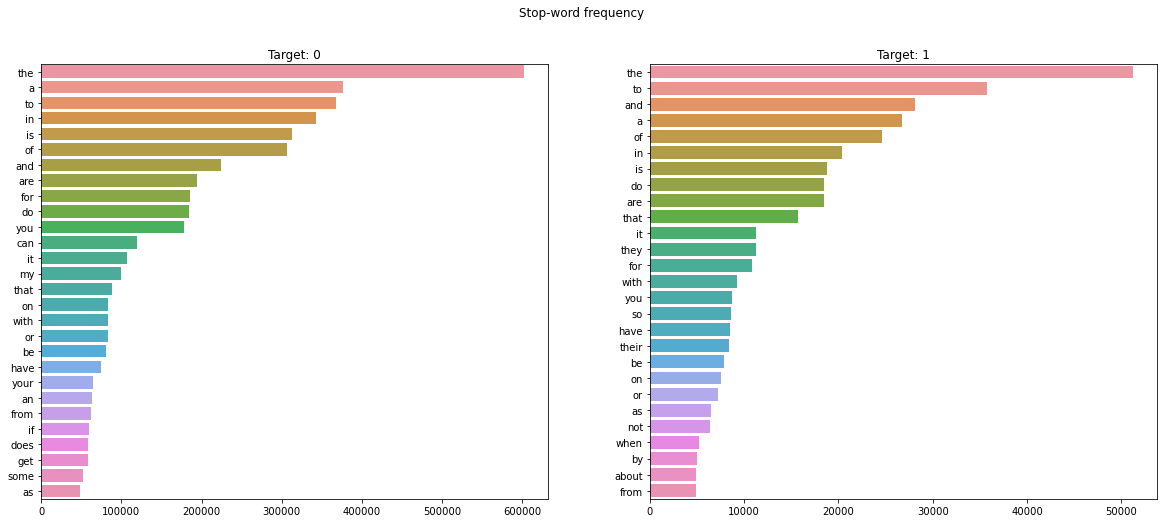

In [15]:
print("Stop-word freuqency")

fig, axes = plt.subplots(1,len(df.target.unique()), figsize=(20,8))
fig.suptitle('Stop-word frequency')

for index,target in enumerate(df.target.unique()):
    dct=defaultdict(int) 
    curdf=df[df['target']==target]  
    
    allwordsarr=curdf.question_text.str.cat().split() #First, we join all strings from the question_text column, then we split em all so that we get an array of all words, which could be counted
    counter=Counter(allwordsarr)
    most=counter.most_common()
    x=[]
    y=[]
    for word,count in most[:30]:
        if (word in STOP_WORDS) :
            x.append(word)
            y.append(count)
    sns.barplot(ax=axes[index],x=y,y=x)
    axes[index].set_title("Target: "+str(target))

Wordcloud


Text(0.5, 0.98, 'Wordcloud')

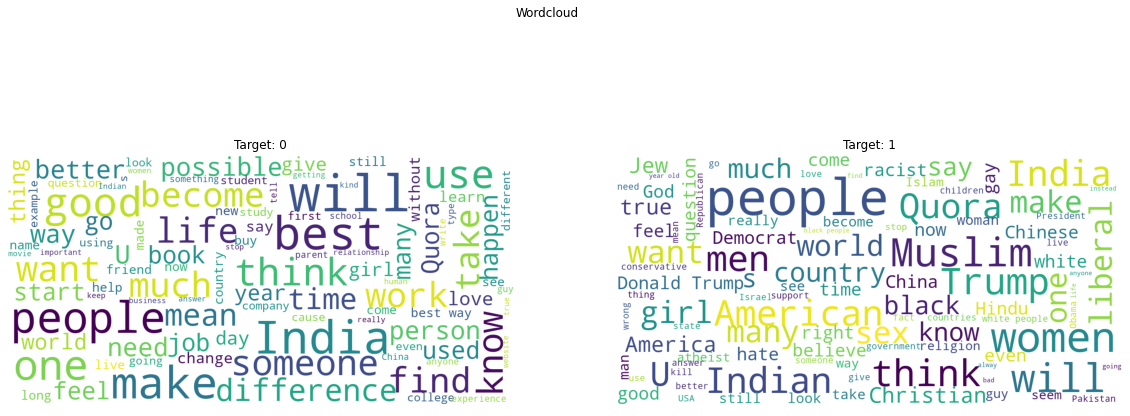

In [16]:
print("Wordcloud")

fig, axes = plt.subplots(1,len(df.target.unique()), figsize=(20,8))

    
for index,target in enumerate(df.target.unique()):
    dct=defaultdict(int) 
    curdf=df[df['target']==target]  
    
    df_fullstring=" ".join(curdf.question_text.str.cat().split()) #first, we join all strings of column, then split by space, then join again because we want a full string here
    wordcloud = WordCloud(background_color='white',max_words=100,
                      max_font_size=40,
                      scale=3,
                      random_state=1).generate(df_fullstring)

    axes[index].imshow(wordcloud)
    axes[index].set_title('Target: '+str(target))
    axes[index].axis('off')
    
fig.suptitle('Wordcloud')

Most commonly occcuring words in all categories


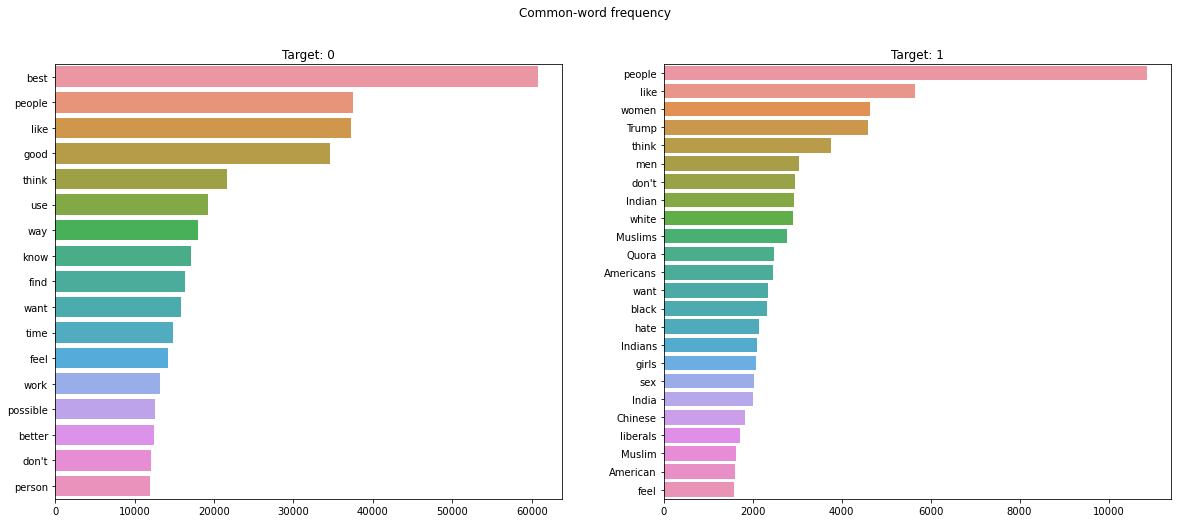

In [17]:

print("Most commonly occcuring words in all categories")

fig, axes = plt.subplots(1,len(df.target.unique()), figsize=(20,8))
fig.suptitle('Common-word frequency')

for index,target in enumerate(df.target.unique()):
    dct=defaultdict(int) 
    curdf=df[df['target']==target]  
    allwordsarr=curdf.question_text.str.cat().split()
    counter=Counter(allwordsarr)
    most=counter.most_common()
    x=[]
    y=[]
    for word,count in most[:100]:
        if (word.lower() not in STOP_WORDS):
            x.append(word)
            y.append(count)
    sns.barplot(ax=axes[index],x=y,y=x)
    axes[index].set_title("Target: "+str(target))

Bigram analysis


<ipython-input-18-fd4e1034613a>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


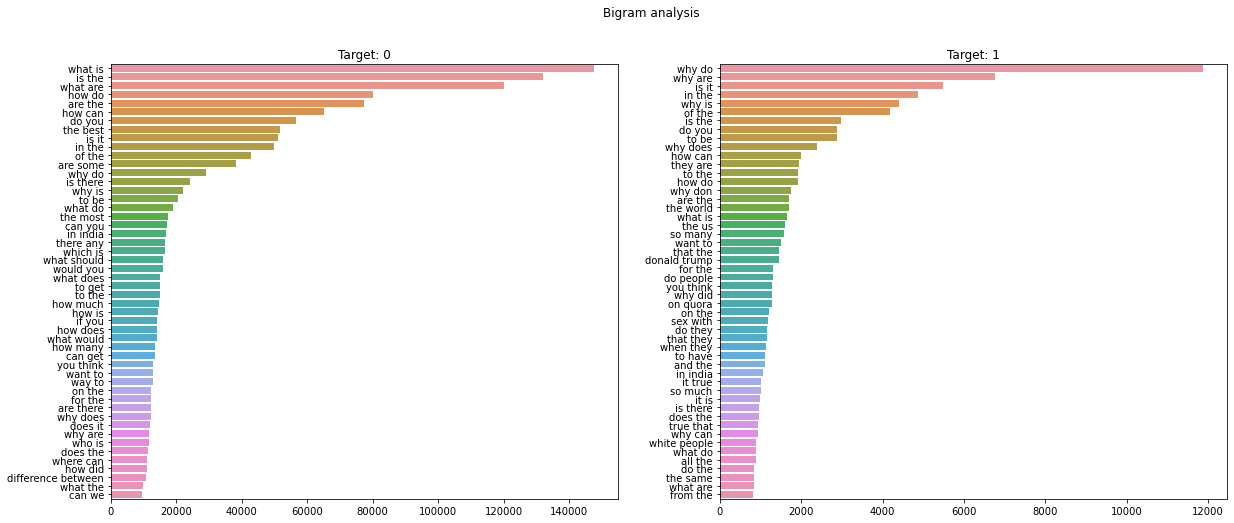

In [18]:
def get_top_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

print("Bigram analysis")

fig, axes = plt.subplots(1,len(df.target.unique()), figsize=(20,8))
fig.suptitle('Bigram analysis')

for index,target in enumerate(df.target.unique()):
    dct=defaultdict(int) 
    top_bigrams=get_top_bigrams(df[df['target']==target].question_text)[:50]
    x,y=map(list,zip(*top_bigrams))
    sns.barplot(ax=axes[index],x=y,y=x)
    axes[index].set_title("Target: "+str(target))

fig.show()

E:\Anaconda\envs\general\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
E:\Anaconda\envs\general\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


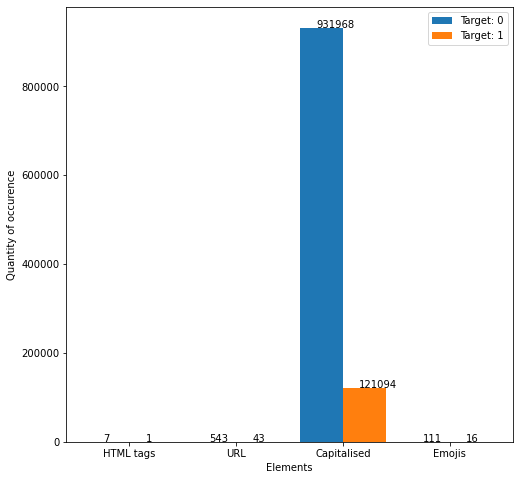

In [19]:
from emoji import UNICODE_EMOJI

def count_emojis(s):
    count = 0
    for emoji in UNICODE_EMOJI['en']:
        count += s.count(emoji)
    return count

allvalues=[]
plt.figure(figsize=(8,8))
for index,target in enumerate(df.target.unique()):
    cur_dict=dict()
    curdf=df[df['target']==target]  
    
    curdf.question_text=curdf.question_text.apply(lambda x: str(x))
    df_caps=" ".join(curdf.question_text.str.cat().split())
    curdf.question_text=curdf.question_text.apply(lambda x: x.lower())
    df_fullstring=curdf.question_text.str.cat()
    cur_dict['HTML tags']=len(re.findall("<.*>",df_fullstring))
    cur_dict['URL']=len(re.findall("http",df_fullstring))
    cur_dict['Capitalised']=len(re.findall("[^\.!\?]\s[A-Z]\w+[\W\?:\.!-_]",df_caps))
    cur_dict['Emojis']=count_emojis(df_caps)
    
    x_keys = list(cur_dict.keys())
    y_values = list(cur_dict.values())
    x_axis = np.arange(len(x_keys))
    bars=plt.bar(x_axis - 0.2+0.4*index, y_values,0.4, label = 'Target: '+str(target))
    allvalues+=y_values
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x()+0.15, yval+5, yval)


    
plt.xticks(x_axis, x_keys)
plt.xlabel("Elements")
plt.ylabel("Quantity of occurence")
plt.legend()
plt.show()

E:\Anaconda\envs\general\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
E:\Anaconda\envs\general\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


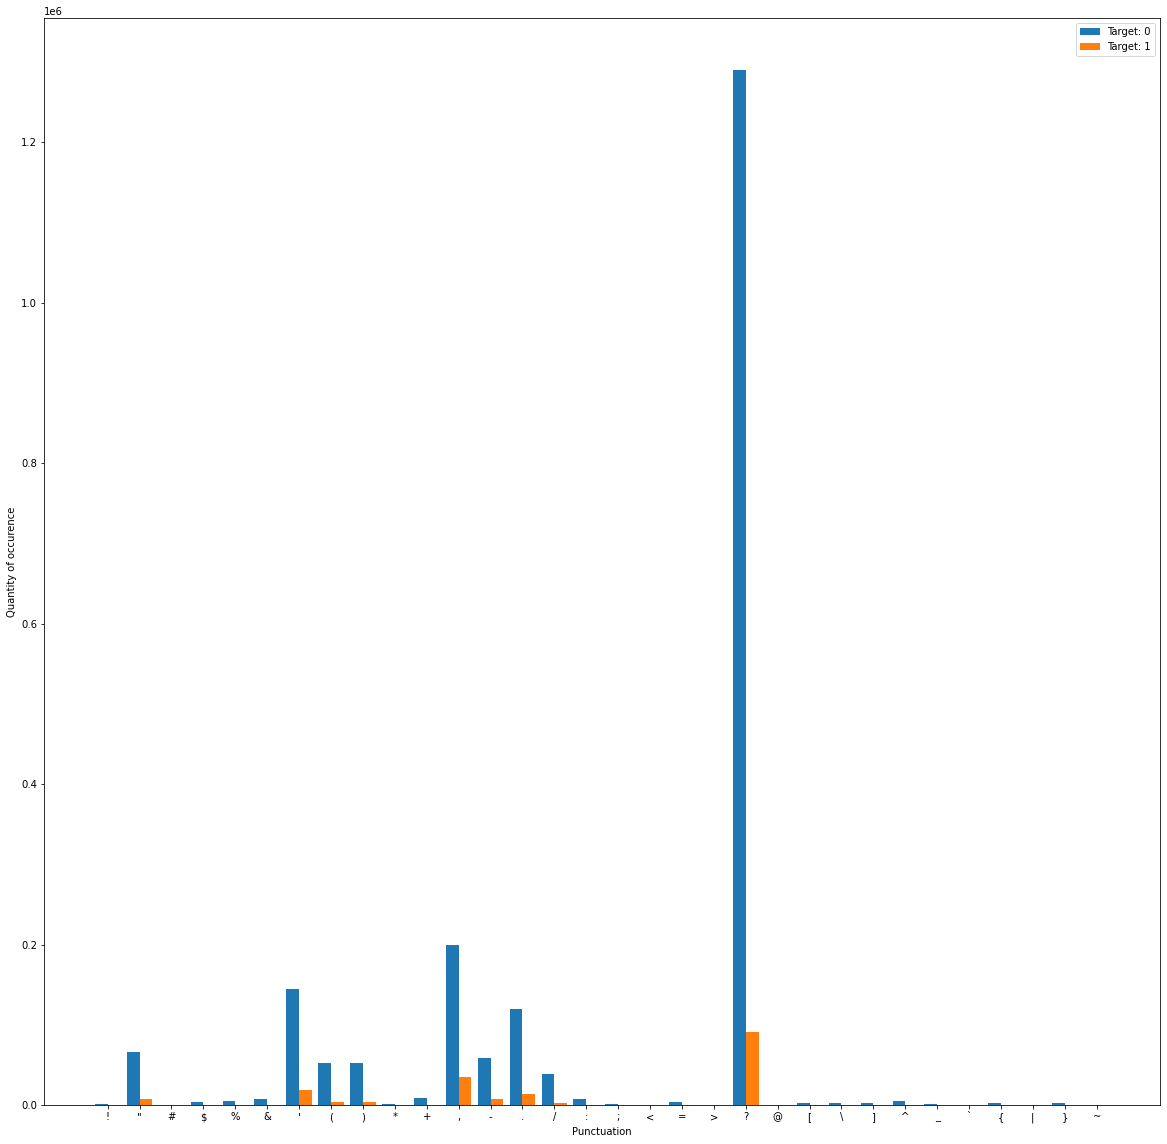

In [20]:
def count_punctuations(s):
    arr=list()
    for punct in string.punctuation:
        count = s.count(punct)
        arr.append(count)
    return arr

allvalues=[]
plt.figure(figsize=(20,20))
for index,target in enumerate(df.target.unique()):
    cur_dict=dict()
    curdf=df[df['target']==target]  
    
    curdf.question_text=curdf.question_text.apply(lambda x: str(x))
    df_fullstring=curdf.question_text.str.cat()
    
    x_keys = string.punctuation
    y_values = count_punctuations(df_fullstring)
    x_axis = np.arange(len(x_keys))
    bars=plt.bar(x_axis - 0.2+0.4*index, y_values,0.4, label = 'Target: '+str(target))
    


    
plt.xticks(x_axis, x_keys)
plt.xlabel("Punctuation")
plt.ylabel("Quantity of occurence")
plt.legend()
plt.show()